In [27]:
!pip install kagglehub


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Sunny\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sunny\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [30]:
print(os.listdir(path))

['insurance.csv']


In [31]:
df =pd.read_csv(path+"/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(1)

In [35]:
# delete duplicate rows if any
df = df.drop_duplicates()

In [36]:
# check unique values in categorical columns
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [37]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


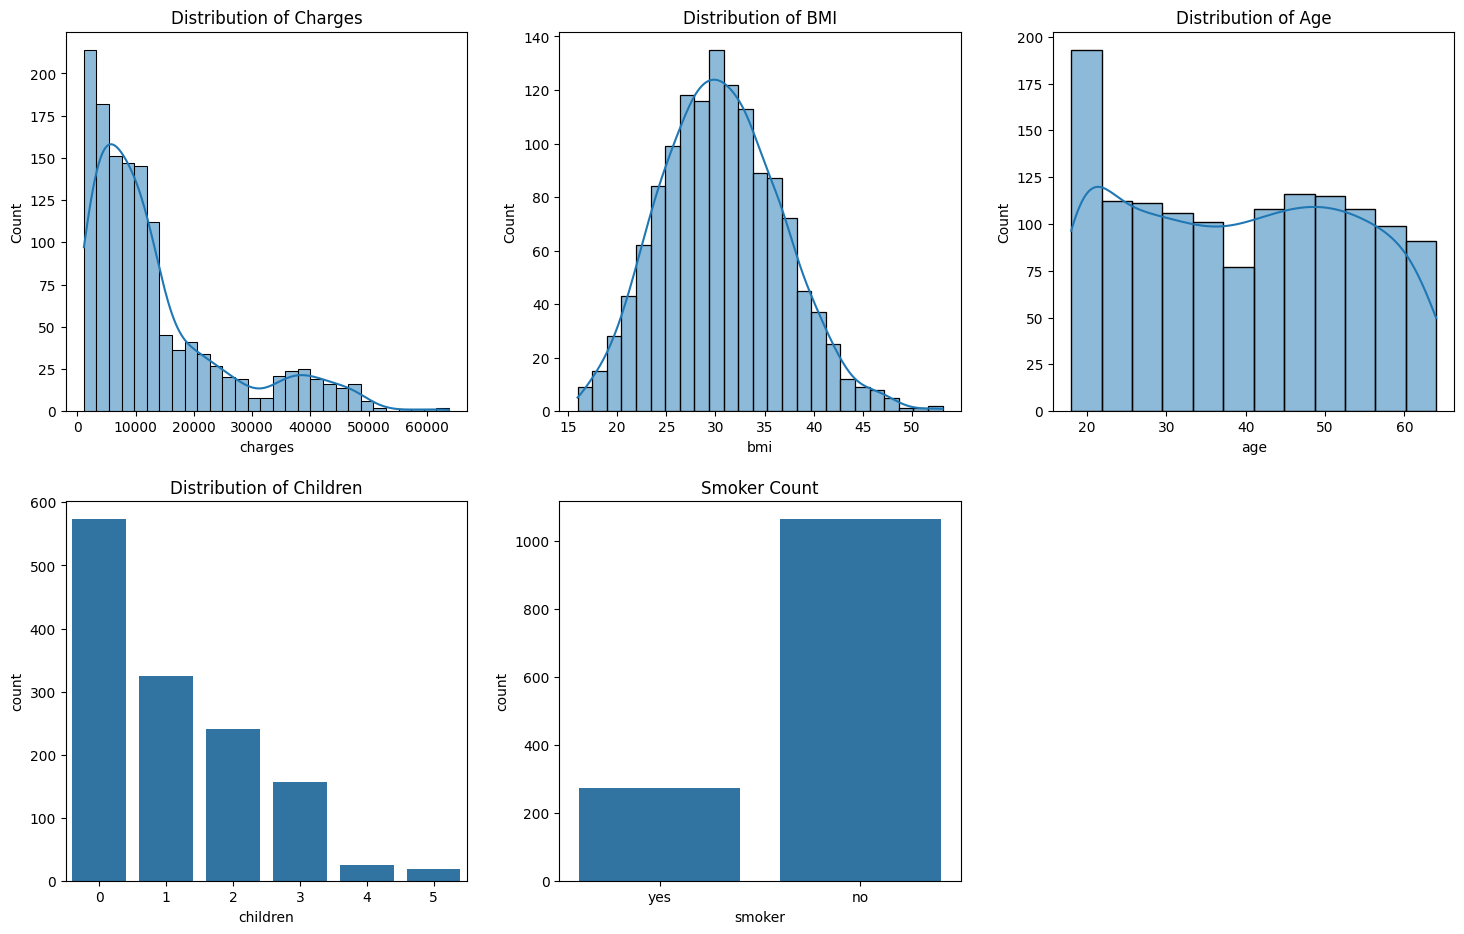

In [38]:
# create visuliazatiojn of distribution of charges, smkoing , BMI, age ,children and region
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

sns.histplot(df['charges'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Charges')

sns.histplot(df['bmi'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of BMI')

sns.histplot(df['age'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Age')

sns.countplot(x='children', data=df, ax=axes[3])
axes[3].set_title('Distribution of Children')

sns.countplot(x='smoker', data=df, ax=axes[4])
axes[4].set_title('Smoker Count')

# If you don't need the 6th subplot, turn it off
axes[5].axis('off')

plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.92)

There are five key insights from this dataset:

Insurance charges are left-skewed, with the majority of costs ranging from $200 to $1,200.

BMI follows a bell-shaped curve, indicating a normal distribution, with both the median and mode centered at 30.

Age distribution shows that clients in their early 20s represent the largest group of insurance subscribers, while the remaining ages are distributed more uniformly.

Number of children exhibits a significant negative correlation with insurance subscribe.

There is a notable class imbalance between non-smokers and smokers.

In [39]:
# charge group by smoker
smoker_group = df.groupby('smoker')['charges']
smoker_stats = smoker_group.describe()
print(smoker_stats)

         count          mean           std         min           25%  \
smoker                                                                 
no      1063.0   8440.660307   5992.973800   1121.8739   3988.883500   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.72660  11363.019100  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


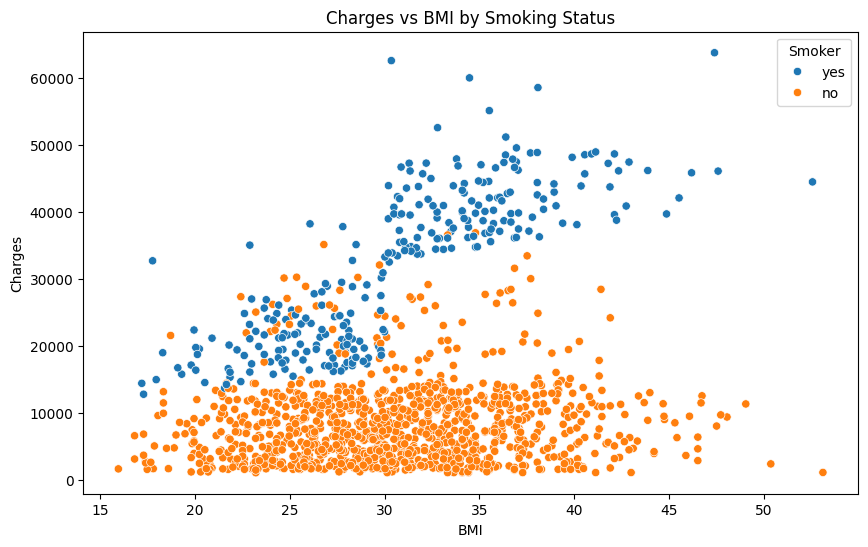

In [40]:
# create visulization between BMI and charges for smoker and non smokers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs BMI by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

There is no signifficant difeerence in BMI between smokers and non-smokers, but smokers tend to have significantly higher insurance charges compared to non-smokers. This suggests that smoking status has a more pronounced impact on insurance costs than BMI alone.